# Imports

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from pandas.core import datetools

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import and Setup Data

Import

In [165]:
daily = pd.read_csv("../datasets/daily.csv", index_col=0)
print(daily.shape)
daily.tail()

(4515, 5)


,1. open,2. high,3. low,4. close,5. volume
2017-12-05,2639.7800,2648.7200,2627.7300,2629.5701,3539040000
2017-12-06,2626.2400,2634.4099,2624.7500,2629.2700,3229000000
2017-12-07,2628.3799,2640.9900,2626.5300,2636.9800,3292400000
2017-12-08,2646.2100,2651.6499,2644.1001,2651.5000,3106150000
2017-12-11,2652.1899,2660.3301,2651.4700,2659.9900,3091950000


Clean as described in Conclusion of EDA

In [166]:
daily.columns = [x.split()[1] for x in daily.columns]
daily.tail()

,open,high,low,close,volume
2017-12-05,2639.7800,2648.7200,2627.7300,2629.5701,3539040000
2017-12-06,2626.2400,2634.4099,2624.7500,2629.2700,3229000000
2017-12-07,2628.3799,2640.9900,2626.5300,2636.9800,3292400000
2017-12-08,2646.2100,2651.6499,2644.1001,2651.5000,3106150000
2017-12-11,2652.1899,2660.3301,2651.4700,2659.9900,3091950000


In [167]:
df_inds = pd.read_csv("../datasets/technical_indicators.csv", index_col=0)
print(df_inds.shape)
df_inds.tail()

(4515, 65)


,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,PLUS_DM,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC
2017-12-05,2634.505,2633.0702,2632.86,2630.9070,2629.6529,2634.505,2632.0071,2238.4404,2458.7267,2635.1249,...,11.3534,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08
2017-12-06,2629.420,2630.5367,2629.37,2628.9712,2628.7524,2629.420,2630.7906,2239.5503,2460.4321,2630.7465,...,5.6767,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08
2017-12-07,2633.125,2634.8322,2634.41,2635.7422,2636.4944,2633.125,2633.1818,2240.6636,2462.1976,2633.4814,...,9.4184,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08
2017-12-08,2644.240,2645.9441,2646.66,2649.9514,2651.2345,2644.240,2641.3232,2241.7807,2464.0906,2643.9513,...,15.3691,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08
2017-12-11,2655.745,2655.3080,2657.16,2659.7651,2660.3427,2655.745,2649.6195,2242.9020,2466.0496,2654.6797,...,16.3647,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09


In [168]:
df = pd.concat((daily, df_inds), axis=1)
df.index = pd.to_datetime(daily.index)
df.tail()

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,PLUS_DM,MIDPRICE,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC
2017-12-05,2639.7800,2648.7200,2627.7300,2629.5701,3539040000,2634.505,2633.0702,2632.86,2630.9070,2629.6529,...,11.3534,2646.4600,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08
2017-12-06,2626.2400,2634.4099,2624.7500,2629.2700,3229000000,2629.420,2630.5367,2629.37,2628.9712,2628.7524,...,5.6767,2636.7350,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08
2017-12-07,2628.3799,2640.9900,2626.5300,2636.9800,3292400000,2633.125,2634.8322,2634.41,2635.7422,2636.4944,...,9.4184,2632.8700,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08
2017-12-08,2646.2100,2651.6499,2644.1001,2651.5000,3106150000,2644.240,2645.9441,2646.66,2649.9514,2651.2345,...,15.3691,2639.0900,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08
2017-12-11,2652.1899,2660.3301,2651.4700,2659.9900,3091950000,2655.745,2655.3080,2657.16,2659.7651,2660.3427,...,16.3647,2652.2151,12.1116,0.4553,58.2697,2664.2350,2655.745,2647.2550,2604.1745,1.842740e+09


Visualize

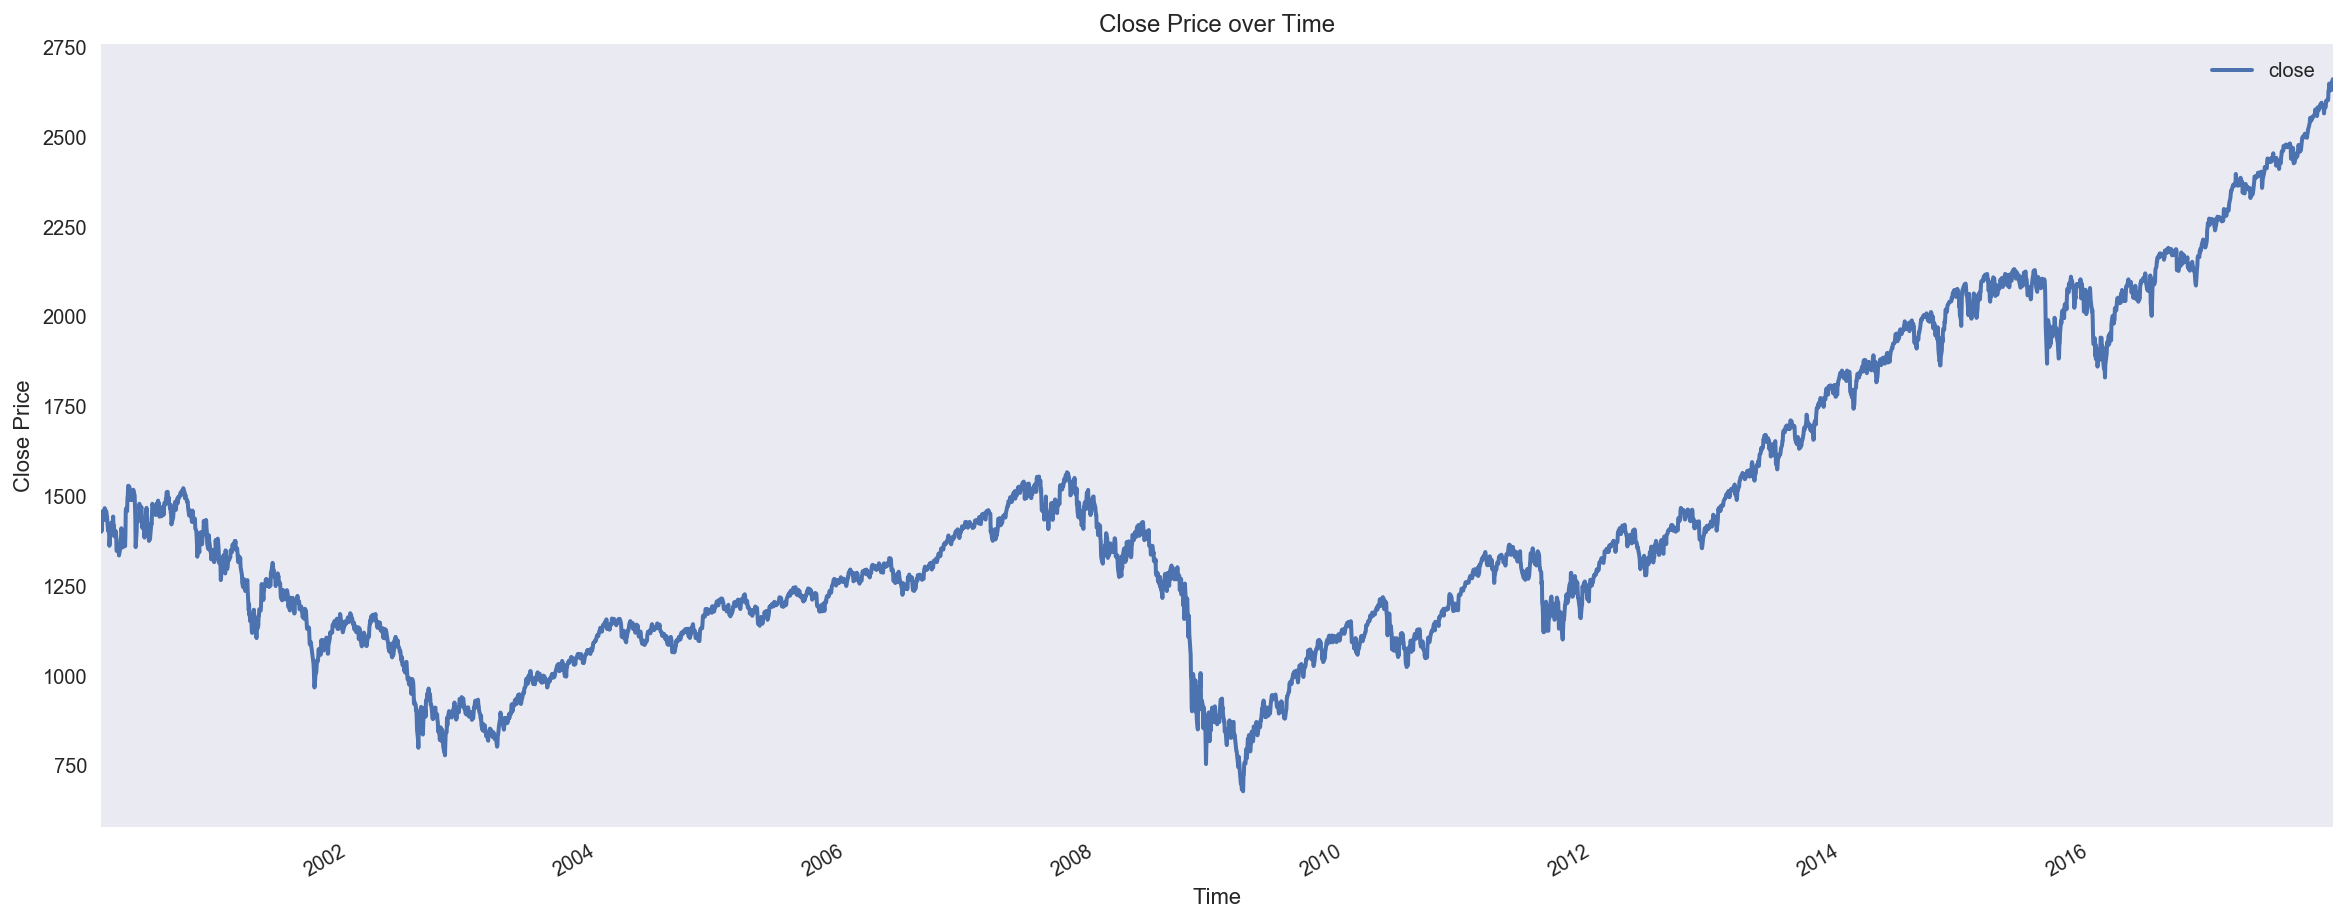

In [169]:
fig, ax = plt.subplots(figsize=(20,8))
df.plot(y='close', ax=ax, lw=2)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Close Price over Time')
plt.grid()
plt.show()

Drop null values, as they represent only the beginning of the data where I do not have data for all the indicators.

In [170]:
df.dropna(inplace=True)
df.shape

(4452, 70)

Shift the target (close price) by -1, making it so that every target value is associated with the indicators from the day before, as that will be the values known when predicting for the next day. Then drop the last row because there will be no correct known answer for it.

In [171]:
df.close = df.close.shift(-1)
df = df[:-1].copy()
df.shape

(4451, 70)

Define functions to return a series representing the change in price for a day, and another one representing whether that change went up or down.

In [172]:
def getCloseDiff(df):
    #returns the difference of the close and open prices
    return df.close - df.open

def getIncrease(df):
    #returns 1 if price increased, 0 if not
    return (df.close_diff > 1).astype(int)


In [173]:
df["close_diff"] = getCloseDiff(df)
df["increase"] = getIncrease(df)

df.tail(5)

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,TEMA,...,ATR,NATR,ULTOSC,Real Upper Band,Real Middle Band,Real Lower Band,SAR,ADOSC,close_diff,increase
2017-12-04,2657.1899,2665.1899,2639.0300,2629.5701,4023150000,2640.830,2640.0704,2640.3666,2640.5811,2639.4926,...,30.2992,1.1479,62.0206,2643.6100,2640.830,2638.0499,2577.4849,1.435635e+09,-27.6198,0
2017-12-05,2639.7800,2648.7200,2627.7300,2629.2700,3539040000,2634.505,2633.0702,2632.8600,2630.9070,2629.6529,...,25.6446,0.9752,56.4417,2644.3749,2634.505,2624.6351,2583.6242,-1.372890e+08,-10.5100,0
2017-12-06,2626.2400,2634.4099,2624.7500,2636.9800,3229000000,2629.420,2630.5367,2629.3700,2628.9712,2628.7524,...,17.6523,0.6714,57.2102,2629.7201,2629.420,2629.1200,2589.3338,-8.342054e+08,10.7400,1
2017-12-07,2628.3799,2640.9900,2626.5300,2651.5000,3292400000,2633.125,2634.8322,2634.4100,2635.7422,2636.4944,...,16.0561,0.6089,53.5239,2640.8350,2633.125,2625.4150,2594.6437,-5.769159e+08,23.1201,1
2017-12-08,2646.2100,2651.6499,2644.1001,2659.9900,3106150000,2644.240,2645.9441,2646.6600,2649.9514,2651.2345,...,15.3630,0.5794,57.9539,2658.7600,2644.240,2629.7200,2599.5820,5.298599e+08,13.7800,1


Visualize the difference in close prices

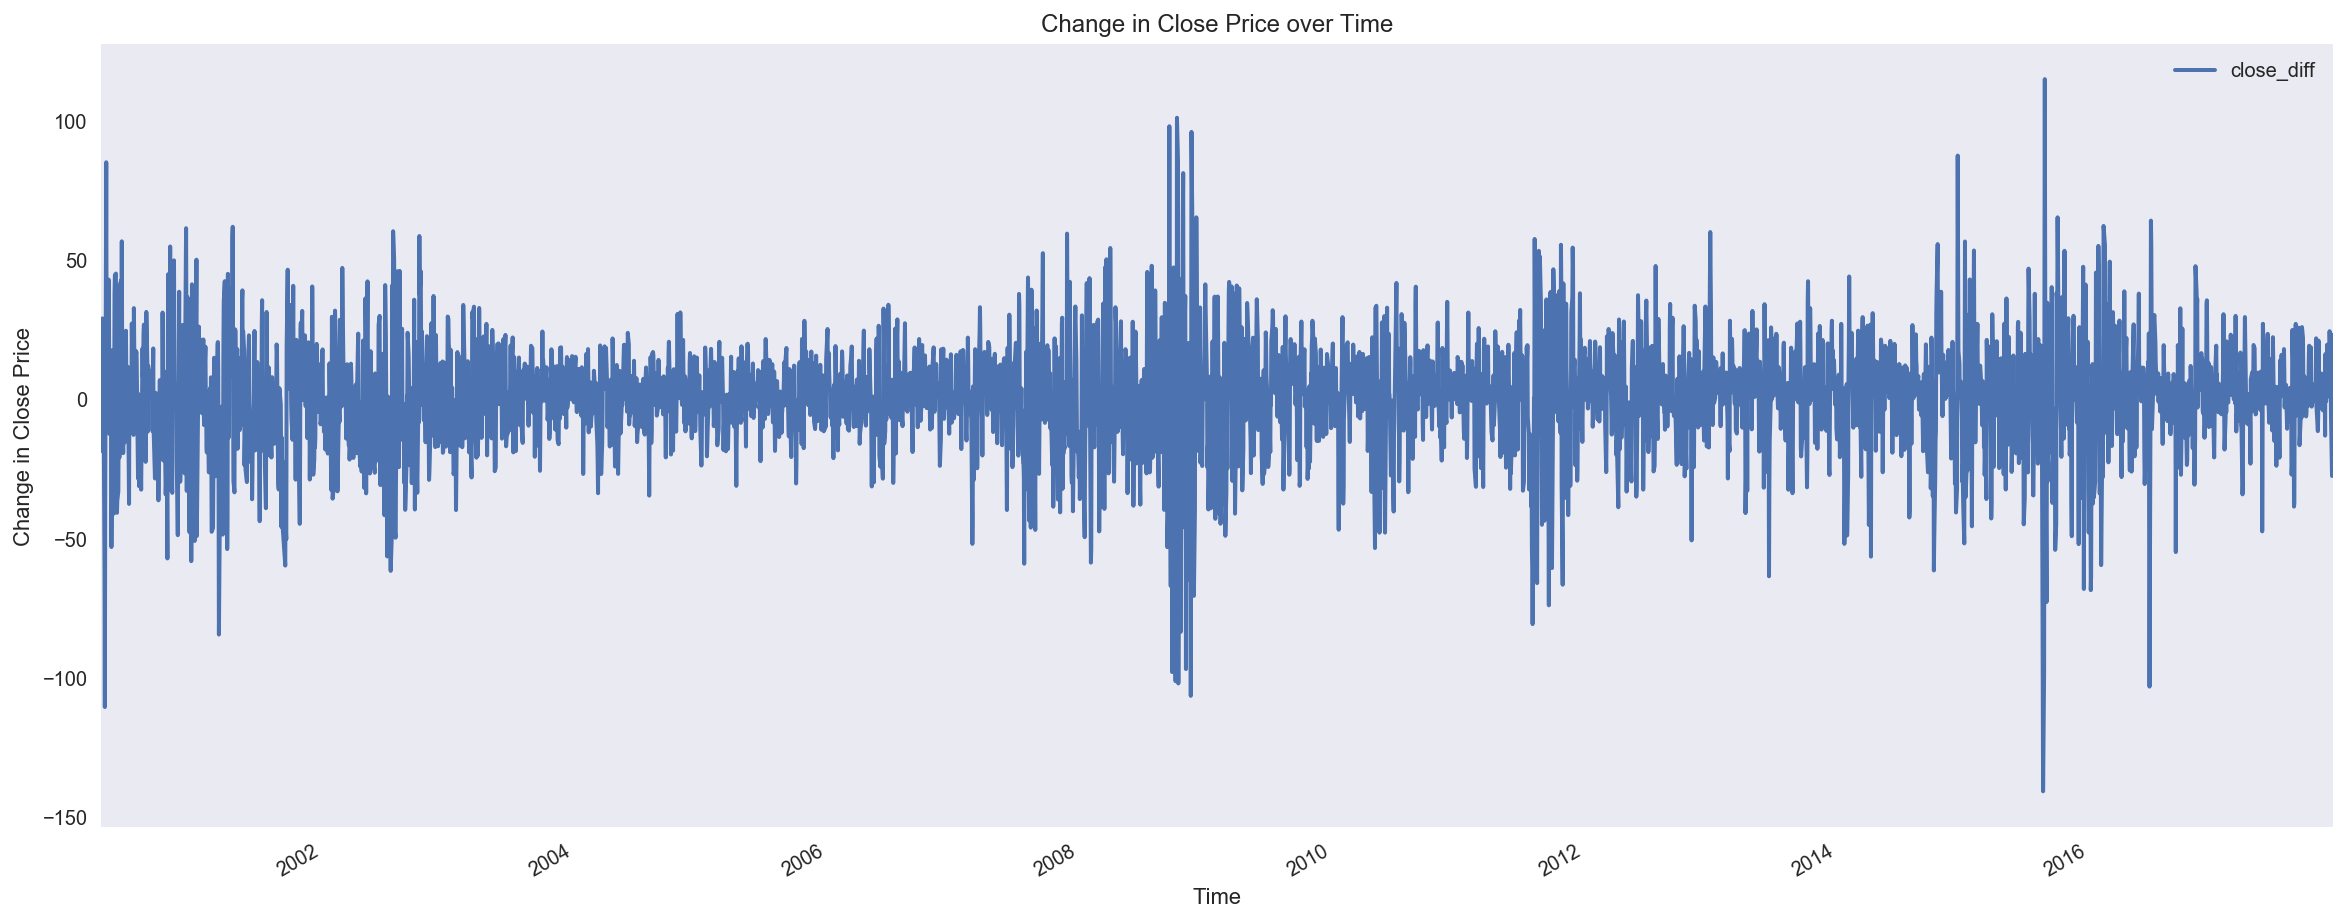

In [174]:
fig, ax = plt.subplots(figsize=(20,8))
df.plot(y='close_diff', ax=ax, lw=2)
plt.xlabel('Time')
plt.ylabel('Change in Close Price')
plt.title('Change in Close Price over Time')
plt.grid()
plt.show()

Look at Correlation with Close, Close_Diff, and Increase

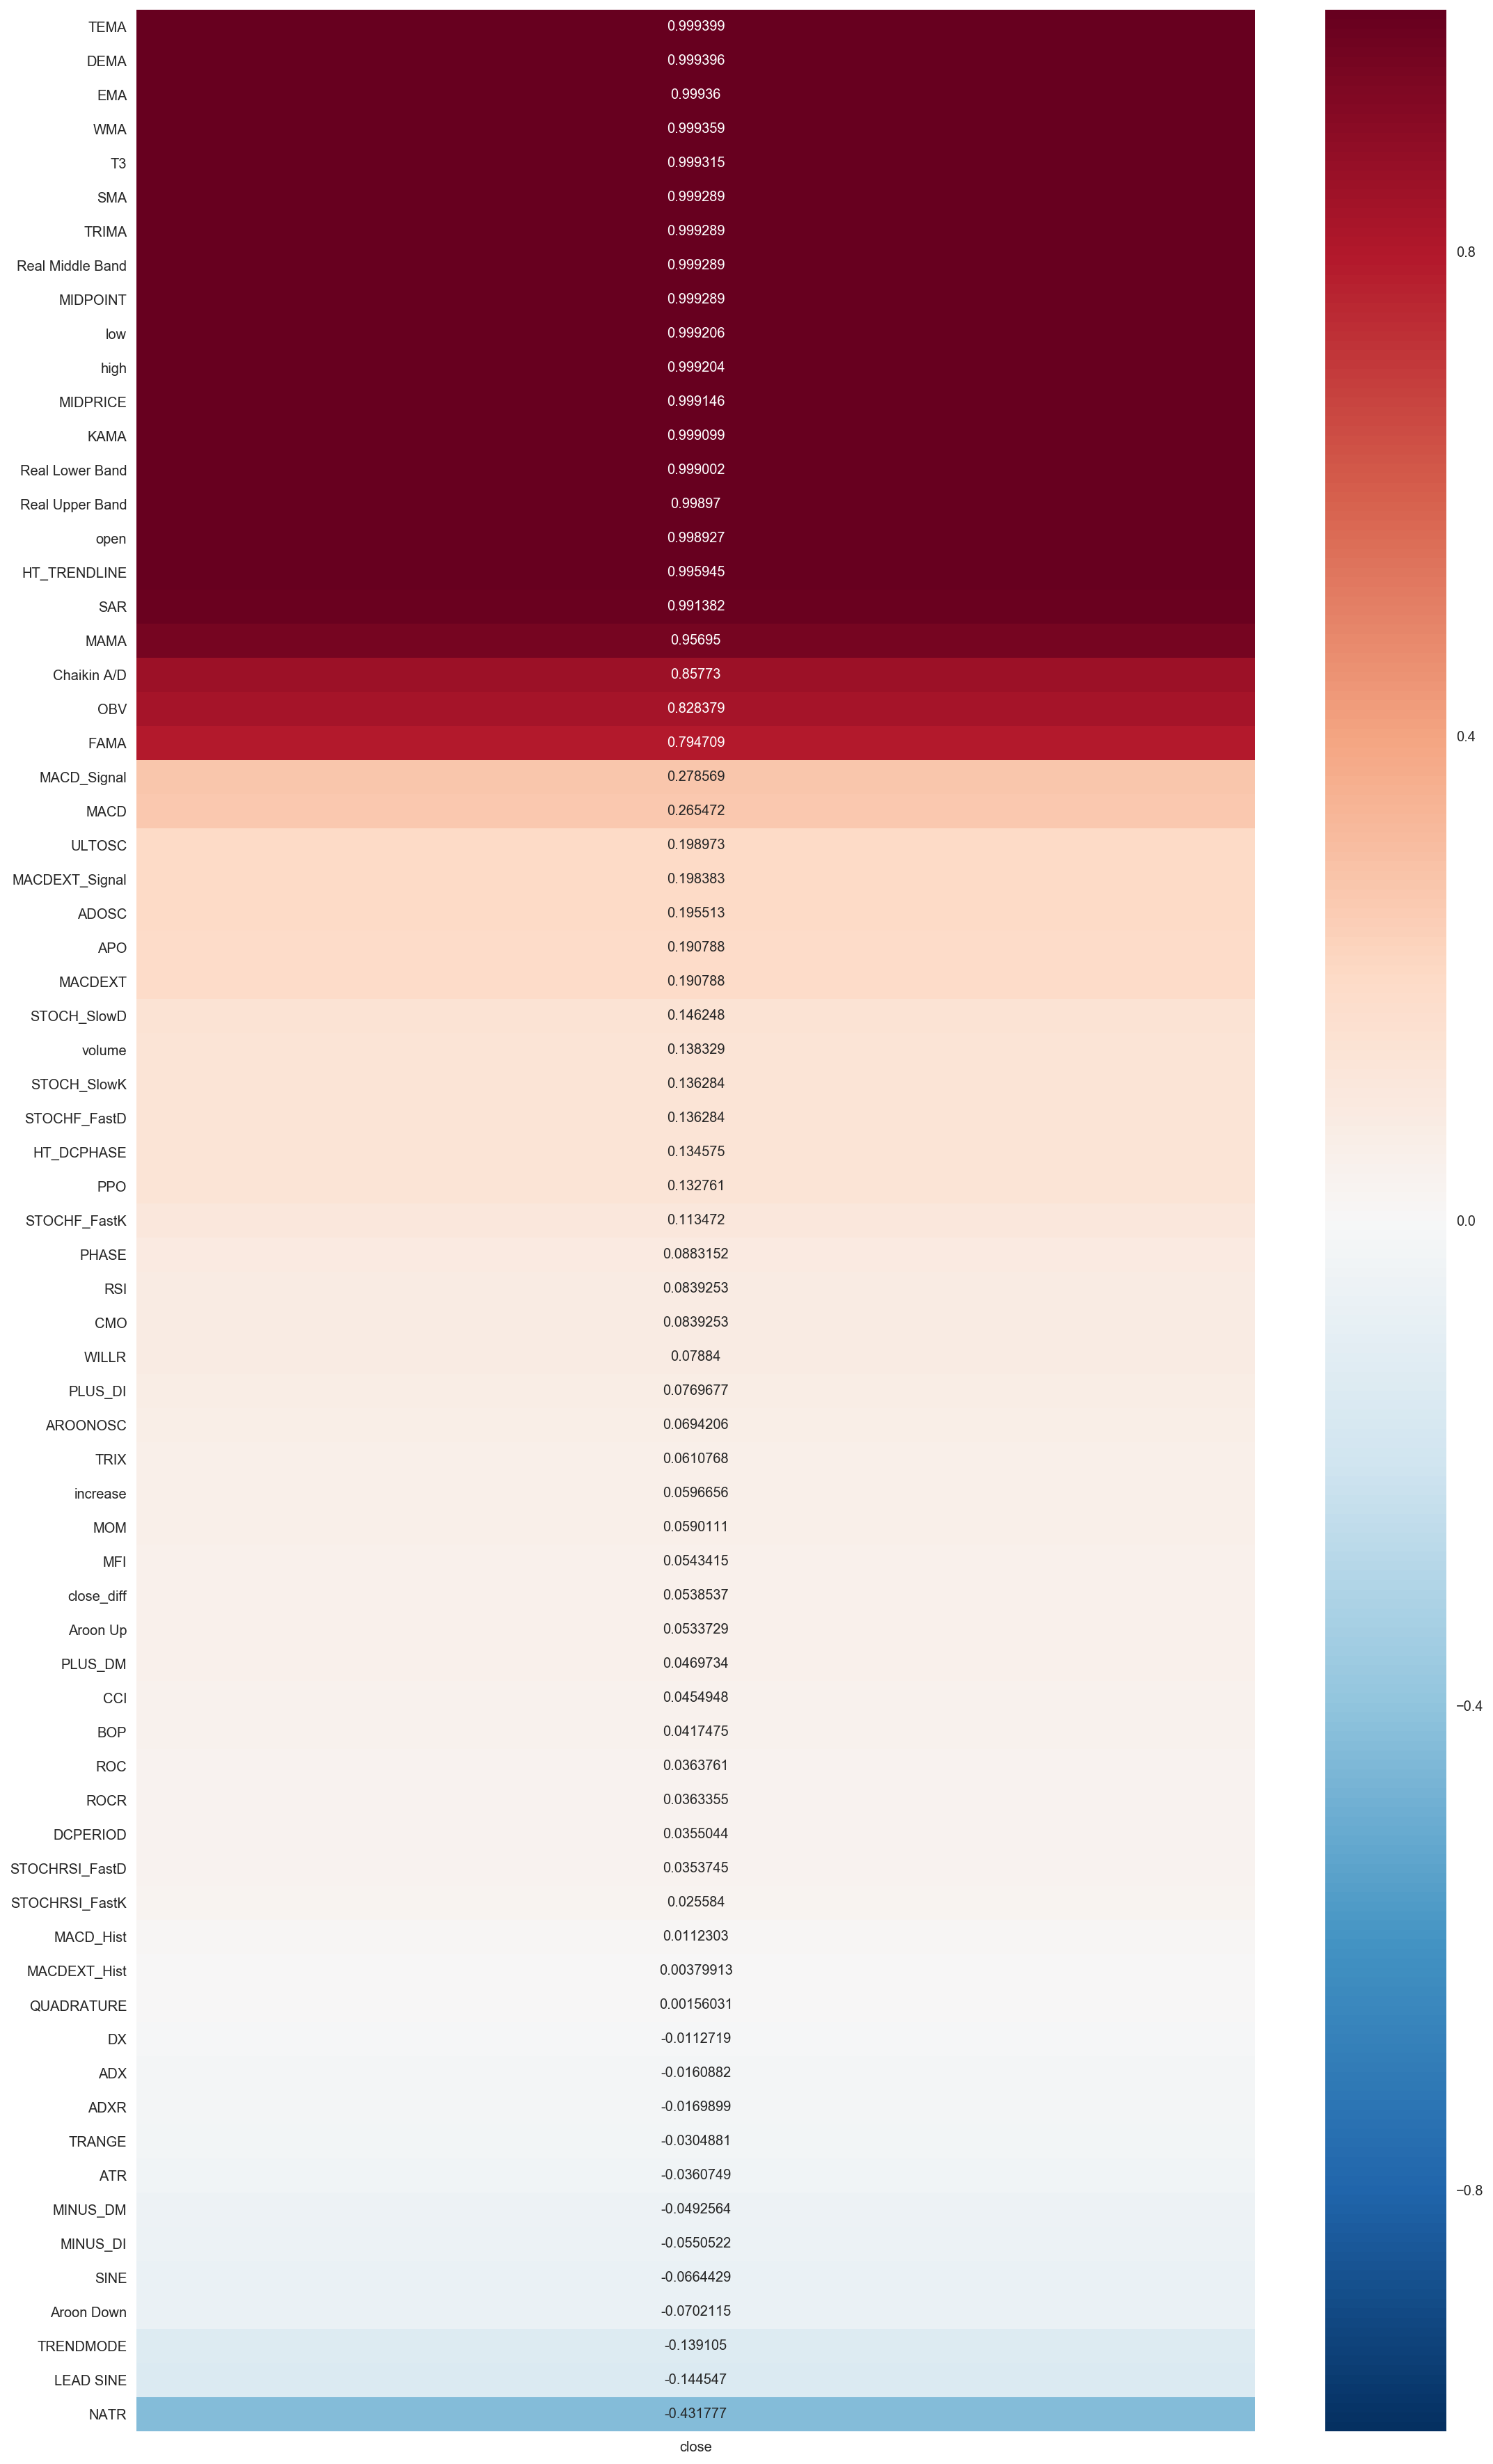

In [175]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df.corr()[['close']].sort_values('close', ascending=False)[1:], ax=ax, annot=True, fmt='.6g');

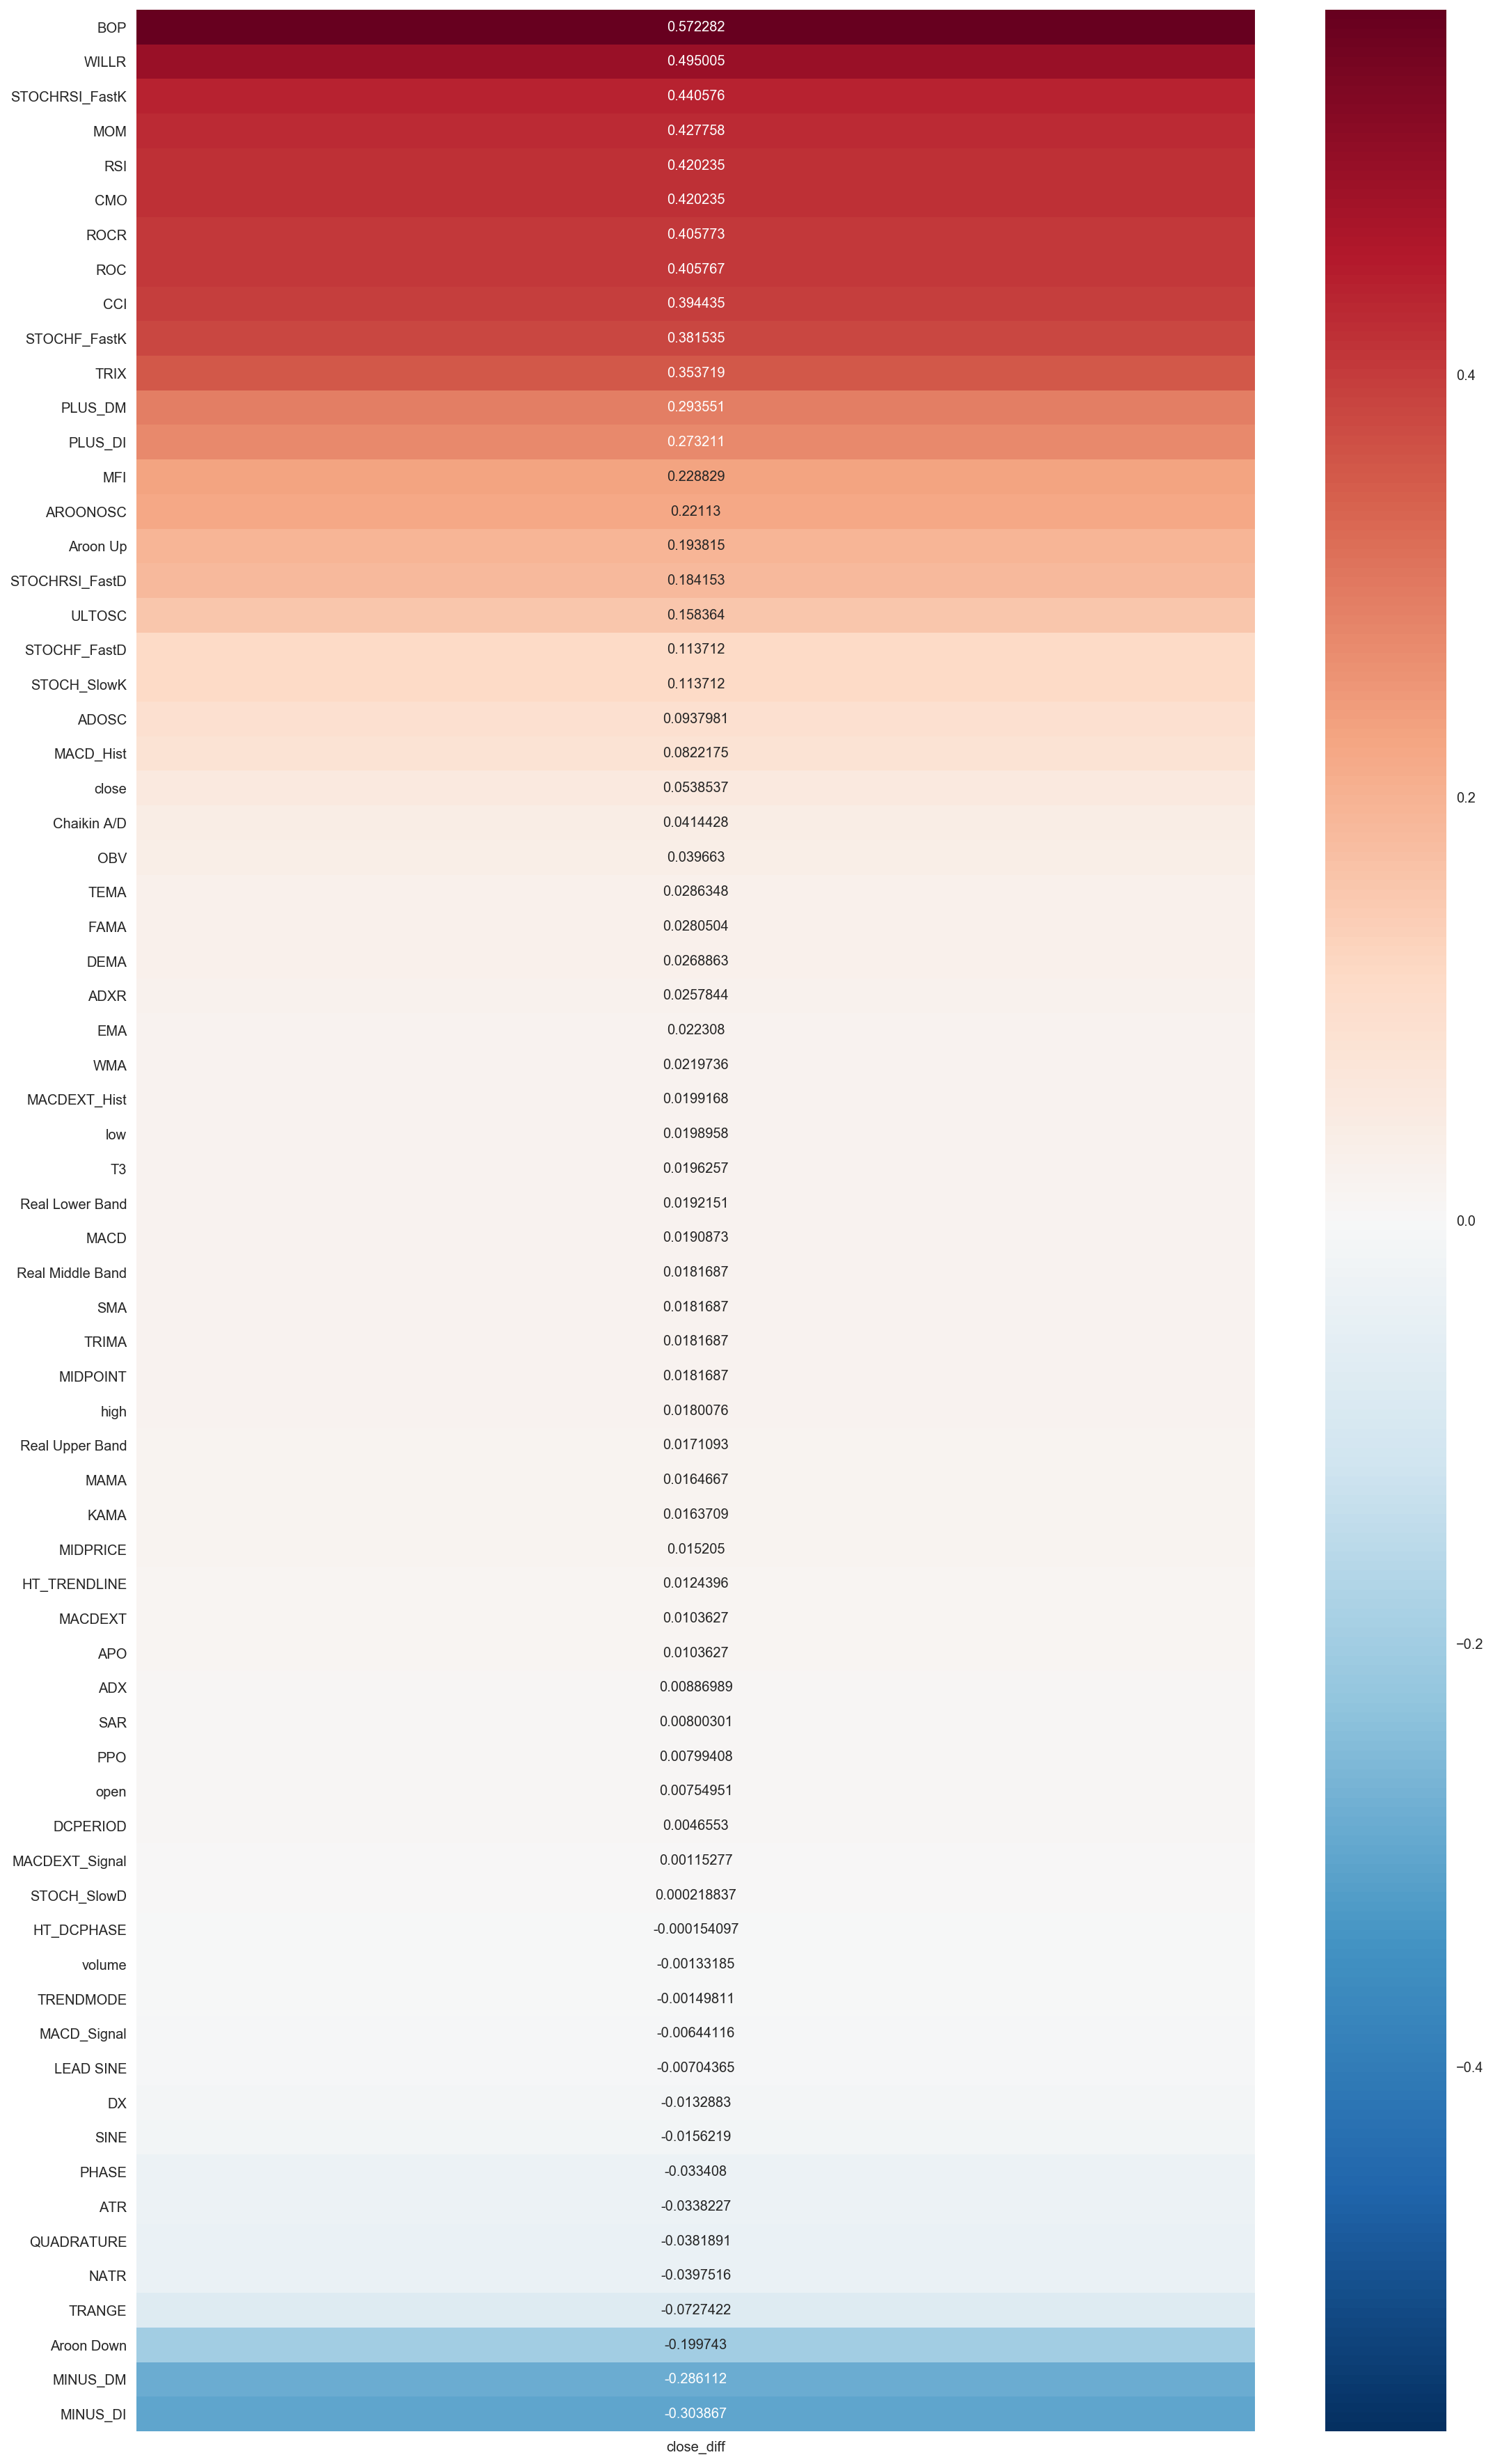

In [176]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df.corr()[['close_diff']].sort_values('close_diff', ascending=False)[2:], ax=ax, annot=True, fmt='.6g');

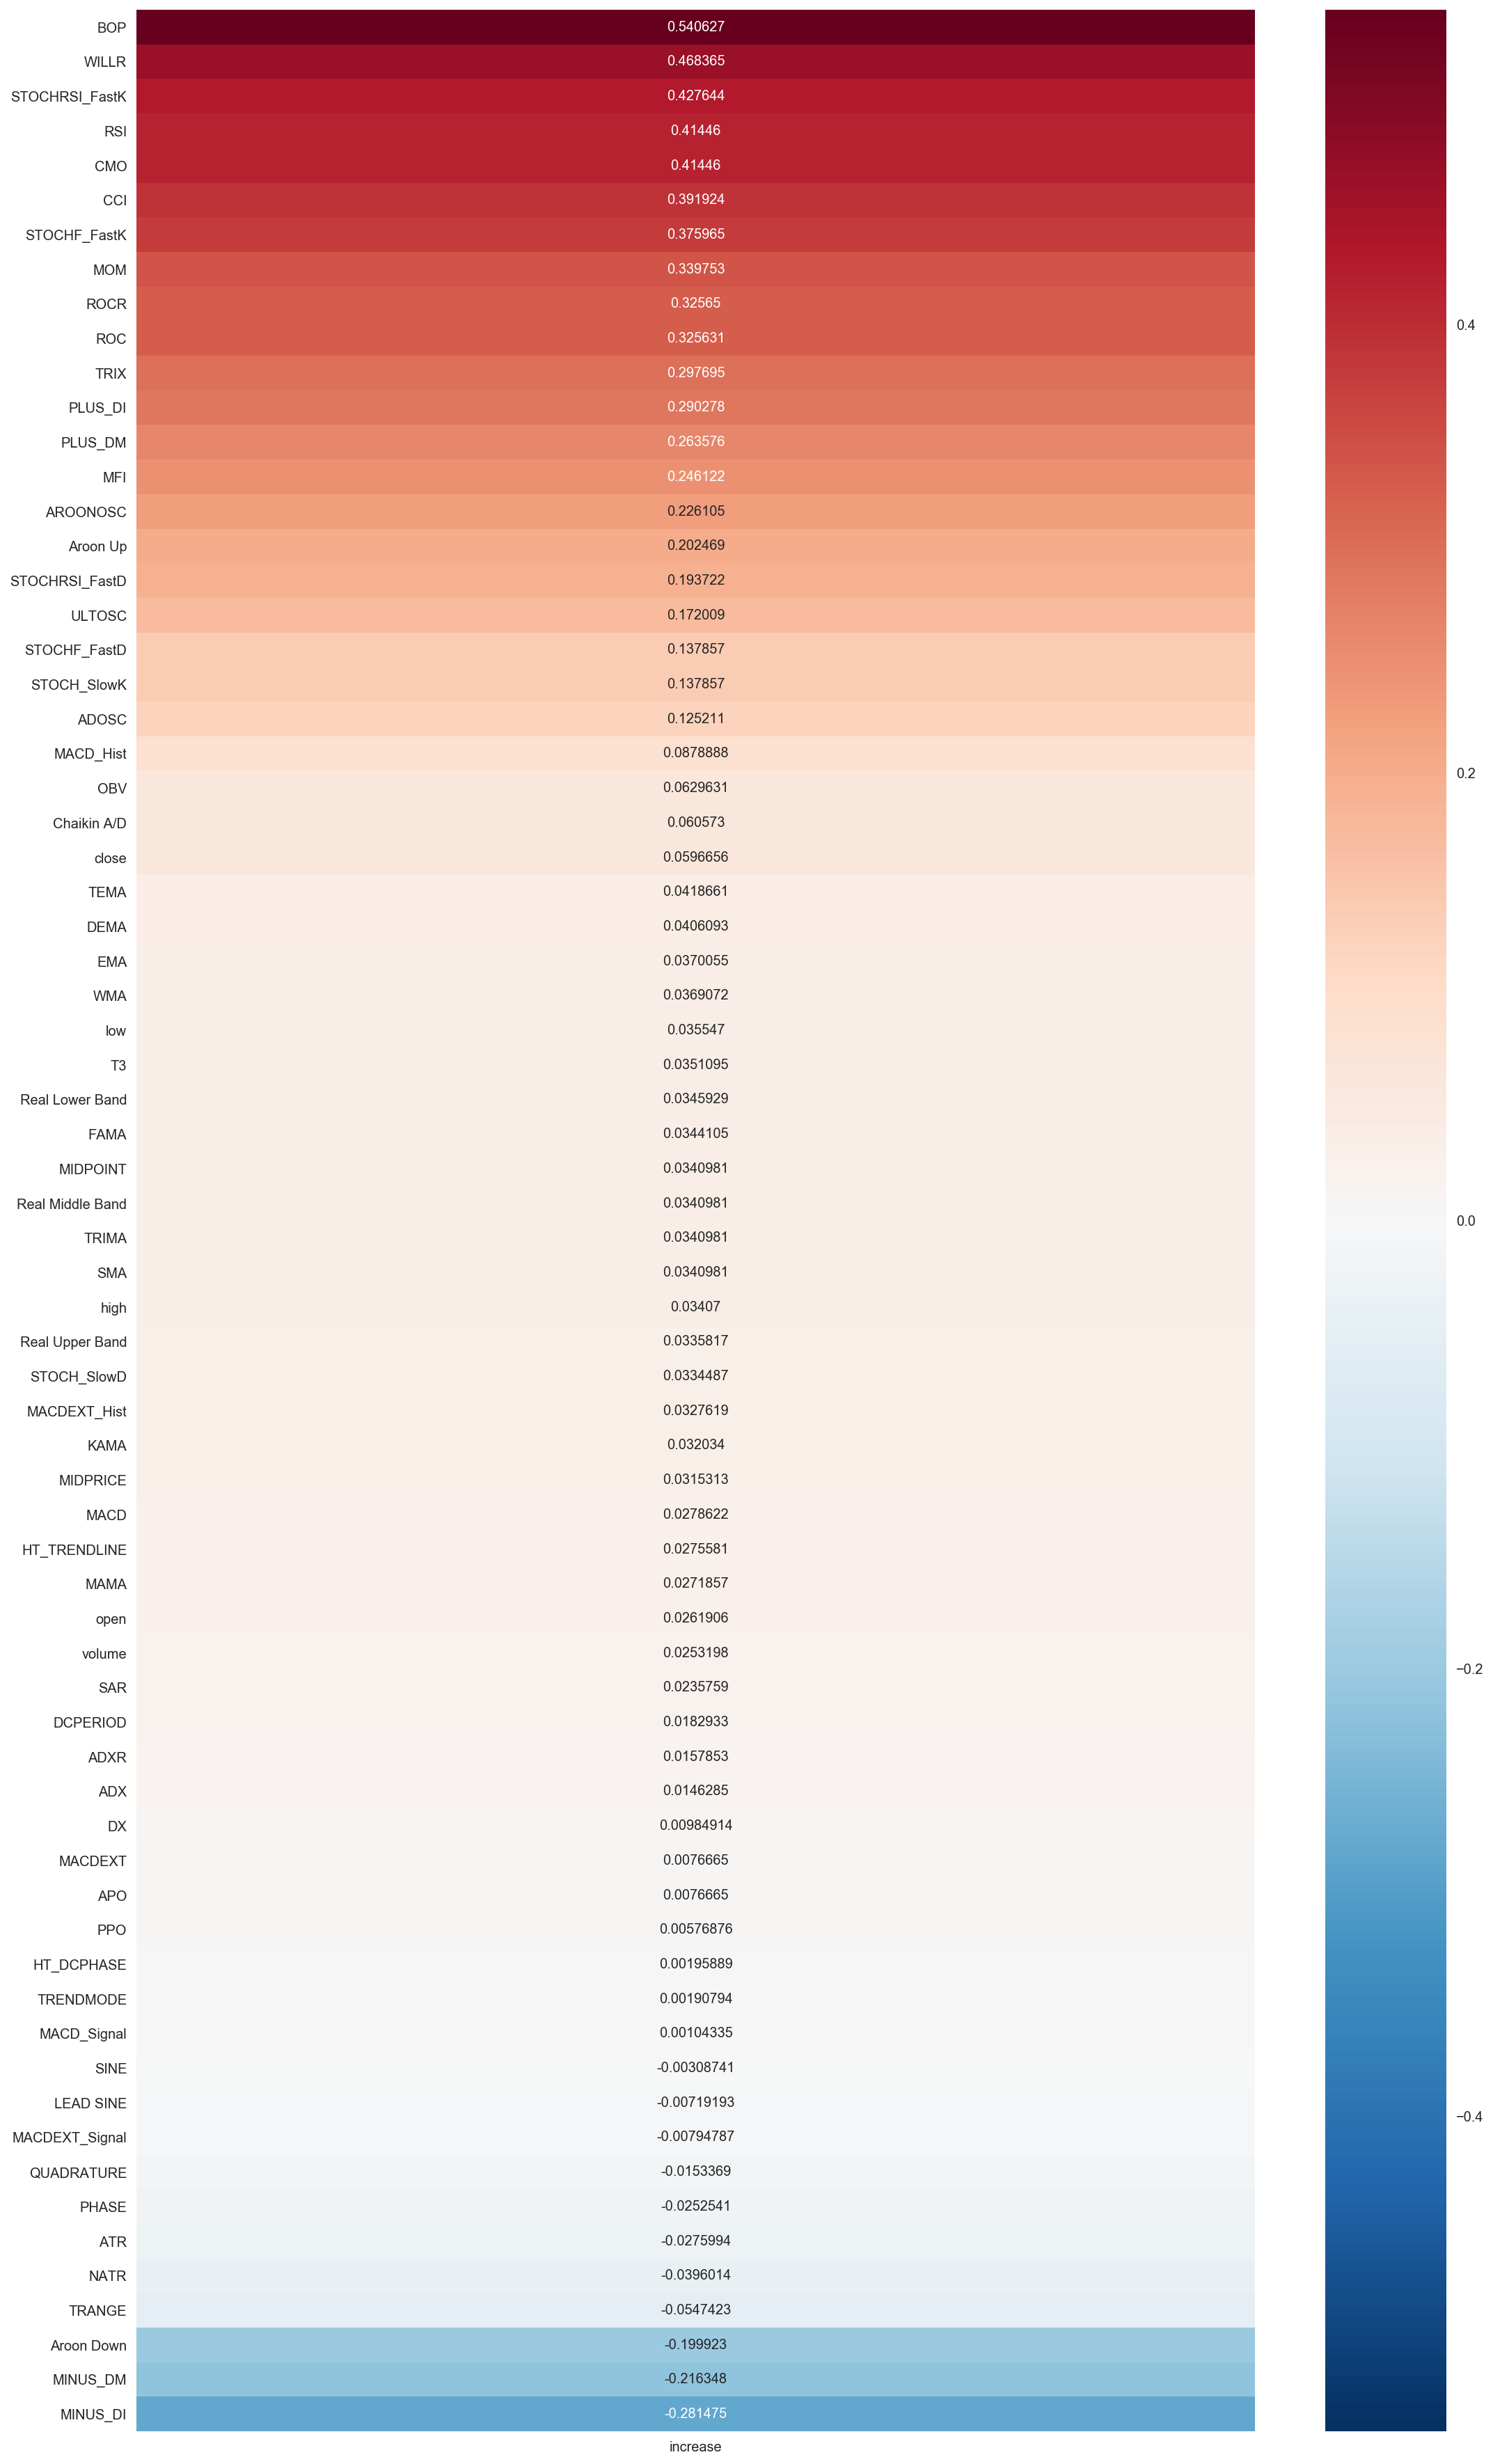

In [177]:
fig, ax = plt.subplots(figsize=(18,32))
sns.heatmap(df.corr()[['increase']].sort_values('increase', ascending=False)[2:], ax=ax, annot=True, fmt='.6g');

I'm going to take the last 60 days, and use them as holdout data, which I will use at the end to see how my model would perform had I used it for the past 2 months. 

I will then do a stratified test train split (with Stratification based on the increase feature) on the remaining data to be used for selecting and tuning a model.

In [178]:
holdout = df[-60:].copy()
df = df[:-60].copy()

print("Holdout Shape: ", holdout.shape)
print("Remaining Shape: ", df.shape)

X_holdout = holdout.drop(['close', 'close_diff', 'increase'], axis=1).copy()
y_holdout = holdout[['close', 'close_diff', 'increase']].copy()

print()
print("X_Holdout: ", X_holdout.shape)
print("y_holdout: ", y_holdout.shape)

Holdout Shape:  (60, 72)
Remaining Shape:  (4391, 72)

X_Holdout:  (60, 69)
y_holdout:  (60, 3)


In [180]:
X = df.drop(['close', 'close_diff', 'increase'], axis=1).copy()
y = df[['close', 'close_diff', 'increase']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y.increase)

print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_holdout = ss.transform(X_holdout)

Train:  (3293, 69) (3293, 3)
Test:  (1098, 69) (1098, 3)


# Make some Models

My goal here is to do a regression to predict the differenc in closing price, which will tell me both if the price has increased or not, and how much. For the scope of this project I am focused more on classification accuracy in regards to the increase in price feature, and to that end I will optimize for that above optimizing for the regression metrics for difference in price.

With my goal in mind, I will use tensorflow to create neural nets. The reason I want to use Tensorflow is that the granularity of control allows me to be generating regerssion values as well as classification predictions, while optimizing on the classification part of the problem, where if I used an sklearn regression it would optimize for regression metrics only.

In [17]:
import tensorflow as tf

In [38]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y')

h1 = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(h1, 1, activation=tf.nn.sigmoid, name='y_hat')

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [65]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = 50000
    ind = range(1,epochs+1)
    tr_losses = []
    te_losses = []
    tr_accuracy = []
    te_accuracy = []
    for epoch  in range(epochs):
        sess.run(training_op, feed_dict={X: X_train, y:y_train.increase.values.reshape(-1,1)})
        train_loss = sess.run(loss, feed_dict={X: X_train, y:y_train.increase.values.reshape(-1,1)})
        tr_losses.append(train_loss)
        test_loss = sess.run(loss, feed_dict={X: X_test, y:y_test.increase.values.reshape(-1,1)})
        te_losses.append(test_loss)
        tr_acc = accuracy_score(y_train.increase.values.reshape(-1,1), sess.run(y_hat, feed_dict={X: X_train}).astype(int))
        tr_accuracy.append(tr_acc)
        te_acc = accuracy_score(y_test.increase.values.reshape(-1,1), sess.run(y_hat, feed_dict={X: X_test}).astype(int))
        te_accuracy.append(te_acc)
        if epoch % 1000 == 0:
            print("Epoch: ", epoch+1, "/", epochs, 
                  "| train_loss: ", train_loss, "| test_loss: ", test_loss)
            print('----------------------------------------------------------')
            
    #
    print("Epoch: ", epoch+1, "/", epochs, 
          "| train_loss: ", train_loss, "| test_loss: ", test_loss)
    print('----------------------------------------------------------')
    pred = sess.run(y_hat, feed_dict={X: X_test})

In [66]:
accuracy_score(y_test.increase.values.reshape(-1,1), pred.astype(int))

0.61918328584995252

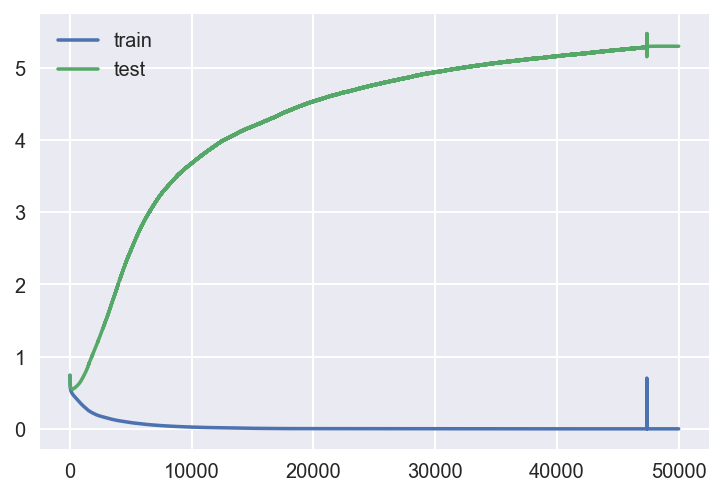

In [67]:
plt.plot(ind, tr_losses, label='train')
plt.plot(ind, te_losses, label='test')
plt.legend()
plt.show()

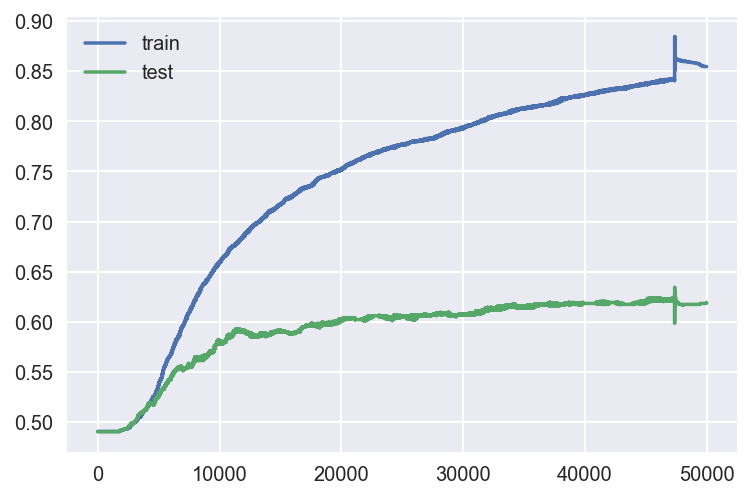

In [68]:
plt.plot(ind, tr_accuracy, label='train')
plt.plot(ind, te_accuracy, label='test')
plt.legend()
plt.show()

In [135]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
#X_open = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='X_open')

y_diff = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y_diff')
y_increase = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y_increase')

h1 = tf.layers.dense(X, 30, activation=tf.nn.relu)
h2 = tf.layers.dense(X, 30, activation=tf.nn.relu)
h3 = tf.layers.dropout(h2, rate = .2)
h4 = tf.layers.dense(h3, 15, activation=tf.nn.relu)

y_diff_hat = tf.layers.dense(h4, 1, activation=tf.identity, name='y_diff_hat')

# zero = tf.constant(0.0, dtype=tf.float32, name="zero")
# y_increase_bool = tf.greater(y_diff_hat, zero, name='y_increase_bool')
# y_increase_num = tf.to_int32(y_increase_bool, name="y_increase_num")

y_increase_hat = tf.layers.dense(h1, 1, activation=tf.nn.sigmoid, name='y_increase_hat')

lossR = tf.losses.mean_squared_error(y_diff, y_diff_hat)
lossC = tf.losses.log_loss(y_increase, y_increase_hat)

optimizer = tf.train.AdamOptimizer()
training_opR = optimizer.minimize(lossR)
training_opC = optimizer.minimize(lossC)

In [136]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = 50000
    ind = range(1,epochs+1)
    tr_losses = []
    te_losses = []
    tr_accuracy = []
    te_accuracy = []
    tr_mse = []
    te_mse = []
    for epoch  in range(epochs):
        if epoch % 50 == 0:
            sess.run(training_opR, feed_dict={X: X_train, y_diff: y_train.close_diff.values.reshape(-1,1), 
                                             y_increase: y_train.increase.values.reshape(-1,1)})
        #end if
        sess.run(training_opC, feed_dict={X: X_train, y_diff: y_train.close_diff.values.reshape(-1,1), 
                                         y_increase: y_train.increase.values.reshape(-1,1)})
        train_loss = sess.run(lossC, feed_dict={X: X_train, y_diff: y_train.close_diff.values.reshape(-1,1), 
                                         y_increase: y_train.increase.values.reshape(-1,1)})
        tr_losses.append(train_loss)
        test_loss = sess.run(lossC, feed_dict={X: X_test, y_diff: y_test.close_diff.values.reshape(-1,1), 
                                         y_increase: y_test.increase.values.reshape(-1,1)})
        te_losses.append(test_loss)
        tr_acc = accuracy_score(y_train.increase.values.reshape(-1,1), sess.run(y_increase_hat, feed_dict={X: X_train}).astype(int))
        tr_accuracy.append(tr_acc)
        te_acc = accuracy_score(y_test.increase.values.reshape(-1,1), sess.run(y_increase_hat, feed_dict={X: X_test}).astype(int))
        te_accuracy.append(te_acc)
        tr_er = mean_squared_error(y_train.close_diff.values.reshape(-1,1), sess.run(y_diff_hat, feed_dict={X: X_train}).astype(int))
        tr_mse.append(tr_er)
        te_er = mean_squared_error(y_test.close_diff.values.reshape(-1,1), sess.run(y_diff_hat, feed_dict={X: X_test}).astype(int))
        te_mse.append(te_er)
        if epoch % 10000 == 0:
            print("Epoch: ", epoch+1, "/", epochs, 
                  "| train_loss: ", train_loss, "| test_loss: ", test_loss,
                 "| train_acc: ", tr_acc, "| test_acc: ", te_acc,
                 "| train_mse: ", tr_er, "| test_mse: ", te_er)
            print('--------------------------------------------------------------------------------')
    #
    print("Epoch: ", epoch+1, "/", epochs, 
                  "| train_loss: ", train_loss, "| test_loss: ", test_loss,
                 "| train_acc: ", tr_acc, "| test_acc: ", te_acc,
                 "| train_mse: ", tr_er, "| test_mse: ", te_er)
    print('--------------------------------------------------------------------------------')
    predR = sess.run(y_diff_hat, feed_dict={X: X_test})
    predC = sess.run(y_increase_hat, feed_dict={X: X_test})

Epoch:  1 / 50000 | train_loss:  0.915671 | test_loss:  0.915682 | train_acc:  0.490500316656 | test_acc:  0.490028490028 | train_mse:  406.559039992 | test_mse:  393.543970317
--------------------------------------------------------------------------------
Epoch:  10001 / 50000 | train_loss:  0.0206978 | test_loss:  3.60051 | train_acc:  0.67542748575 | test_acc:  0.598290598291 | train_mse:  172.933266464 | test_mse:  256.057025588
--------------------------------------------------------------------------------
Epoch:  20001 / 50000 | train_loss:  0.00155447 | test_loss:  4.5088 | train_acc:  0.77485750475 | test_acc:  0.628679962013 | train_mse:  129.239236635 | test_mse:  298.842972596
--------------------------------------------------------------------------------
Epoch:  30001 / 50000 | train_loss:  0.000128383 | test_loss:  4.83247 | train_acc:  0.810956301457 | test_acc:  0.641025641026 | train_mse:  110.20519718 | test_mse:  327.788158921
--------------------------------------

In [137]:
r2_score(y_test.close_diff.values.reshape(-1,1), predR)

0.05230925374954154

In [138]:
mean_squared_error(y_test.close_diff.values.reshape(-1,1), predR)

374.63225406184063

In [139]:
accuracy_score(y_test.increase.values.reshape(-1,1), predC.astype(int))

0.64292497625830958

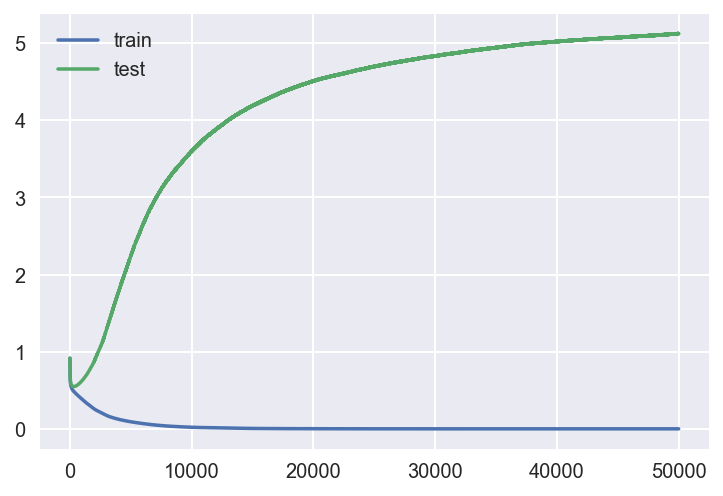

In [140]:
plt.plot(ind, tr_losses, label='train')
plt.plot(ind, te_losses, label='test')
plt.legend()
plt.show()

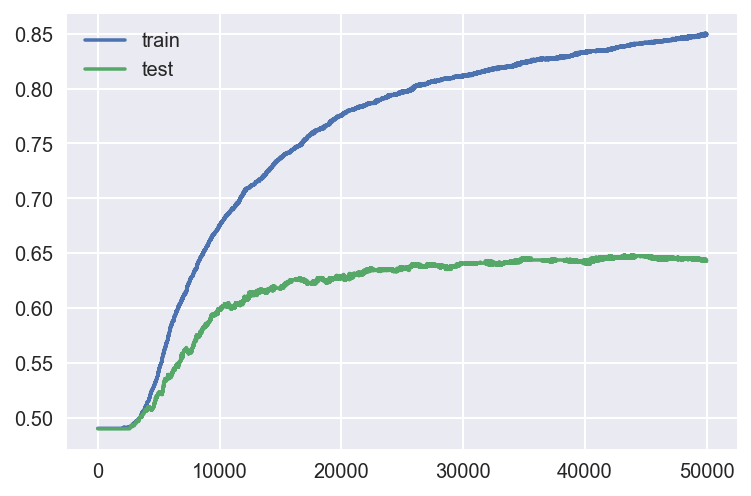

In [141]:
plt.plot(ind, tr_accuracy, label='train')
plt.plot(ind, te_accuracy, label='test')
plt.legend()
plt.show()

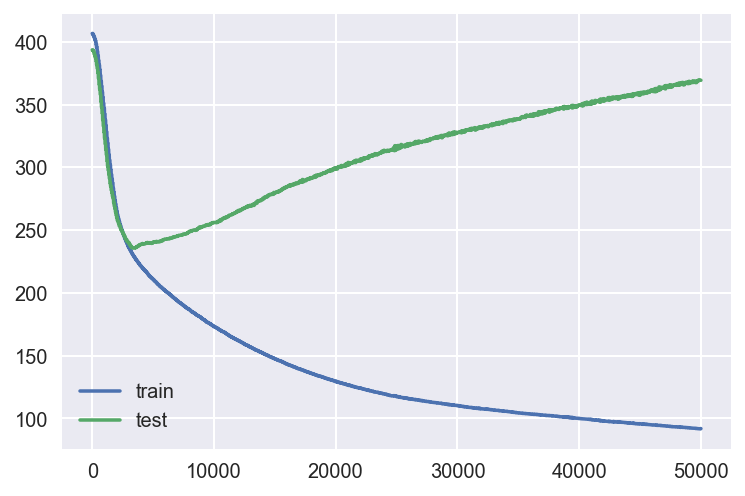

In [142]:
plt.plot(ind, tr_mse, label='train')
plt.plot(ind, te_mse, label='test')
plt.legend()
plt.show()

### Get Results for Holdout Data

In [181]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
#X_open = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='X_open')

y_diff = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y_diff')
y_increase = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y_increase')

h1 = tf.layers.dense(X, 30, activation=tf.nn.relu)
h2 = tf.layers.dense(X, 30, activation=tf.nn.relu)
h3 = tf.layers.dropout(h2, rate = .2)
h4 = tf.layers.dense(h3, 15, activation=tf.nn.relu)
h5 = tf.layers.dropout(h4, rate = .2)

y_diff_hat = tf.layers.dense(h5, 1, activation=tf.identity, name='y_diff_hat')

# zero = tf.constant(0.0, dtype=tf.float32, name="zero")
# y_increase_bool = tf.greater(y_diff_hat, zero, name='y_increase_bool')
# y_increase_num = tf.to_int32(y_increase_bool, name="y_increase_num")

y_increase_hat = tf.layers.dense(h1, 1, activation=tf.nn.sigmoid, name='y_increase_hat')

lossR = tf.losses.mean_squared_error(y_diff, y_diff_hat)
lossC = tf.losses.log_loss(y_increase, y_increase_hat)

optimizer = tf.train.AdamOptimizer()
training_opR = optimizer.minimize(lossR)
training_opC = optimizer.minimize(lossC)

In [182]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = 50000
    ind = range(1,epochs+1)
    tr_losses = []
    te_losses = []
    tr_accuracy = []
    te_accuracy = []
    tr_mse = []
    te_mse = []
    for epoch  in range(epochs):
        if epoch % 500 == 0:
            sess.run(training_opR, feed_dict={X: X_train, y_diff: y_train.close_diff.values.reshape(-1,1), 
                                             y_increase: y_train.increase.values.reshape(-1,1)})
        #end if
        sess.run(training_opC, feed_dict={X: X_train, y_diff: y_train.close_diff.values.reshape(-1,1), 
                                         y_increase: y_train.increase.values.reshape(-1,1)})
        train_loss = sess.run(lossC, feed_dict={X: X_train, y_diff: y_train.close_diff.values.reshape(-1,1), 
                                         y_increase: y_train.increase.values.reshape(-1,1)})
        tr_losses.append(train_loss)
        test_loss = sess.run(lossC, feed_dict={X: X_test, y_diff: y_test.close_diff.values.reshape(-1,1), 
                                         y_increase: y_test.increase.values.reshape(-1,1)})
        te_losses.append(test_loss)
        tr_acc = accuracy_score(y_train.increase.values.reshape(-1,1), sess.run(y_increase_hat, feed_dict={X: X_train}).astype(int))
        tr_accuracy.append(tr_acc)
        te_acc = accuracy_score(y_test.increase.values.reshape(-1,1), sess.run(y_increase_hat, feed_dict={X: X_test}).astype(int))
        te_accuracy.append(te_acc)
        tr_er = mean_squared_error(y_train.close_diff.values.reshape(-1,1), sess.run(y_diff_hat, feed_dict={X: X_train}).astype(int))
        tr_mse.append(tr_er)
        te_er = mean_squared_error(y_test.close_diff.values.reshape(-1,1), sess.run(y_diff_hat, feed_dict={X: X_test}).astype(int))
        te_mse.append(te_er)
        if epoch % 10000 == 0:
            print("Epoch: ", epoch+1, "/", epochs, 
                  "| train_loss: ", train_loss, "| test_loss: ", test_loss,
                 "| train_acc: ", tr_acc, "| test_acc: ", te_acc,
                 "| train_mse: ", tr_er, "| test_mse: ", te_er)
            print('--------------------------------------------------------------------------------')
    #
    print("Epoch: ", epoch+1, "/", epochs, 
                  "| train_loss: ", train_loss, "| test_loss: ", test_loss,
                 "| train_acc: ", tr_acc, "| test_acc: ", te_acc,
                 "| train_mse: ", tr_er, "| test_mse: ", te_er)
    print('--------------------------------------------------------------------------------')
    predR = sess.run(y_diff_hat, feed_dict={X: X_test})
    predC = sess.run(y_increase_hat, feed_dict={X: X_test})
    holdout_predR = sess.run(y_diff_hat, feed_dict={X: X_holdout})
    holdout_predC = sess.run(y_increase_hat, feed_dict={X: X_holdout})

Epoch:  1 / 50000 | train_loss:  0.920253 | test_loss:  0.943896 | train_acc:  0.489826905557 | test_acc:  0.489981785064 | train_mse:  388.578259692 | test_mse:  430.201198381
--------------------------------------------------------------------------------
Epoch:  10001 / 50000 | train_loss:  0.0369354 | test_loss:  3.46062 | train_acc:  0.642575159429 | test_acc:  0.58014571949 | train_mse:  300.529763731 | test_mse:  326.545928983
--------------------------------------------------------------------------------
Epoch:  20001 / 50000 | train_loss:  0.00817522 | test_loss:  4.44871 | train_acc:  0.753720012147 | test_acc:  0.620218579235 | train_mse:  243.216246574 | test_mse:  284.964868509
--------------------------------------------------------------------------------
Epoch:  30001 / 50000 | train_loss:  0.00521023 | test_loss:  4.81677 | train_acc:  0.796841785606 | test_acc:  0.623861566485 | train_mse:  223.766870382 | test_mse:  269.351083081
------------------------------------

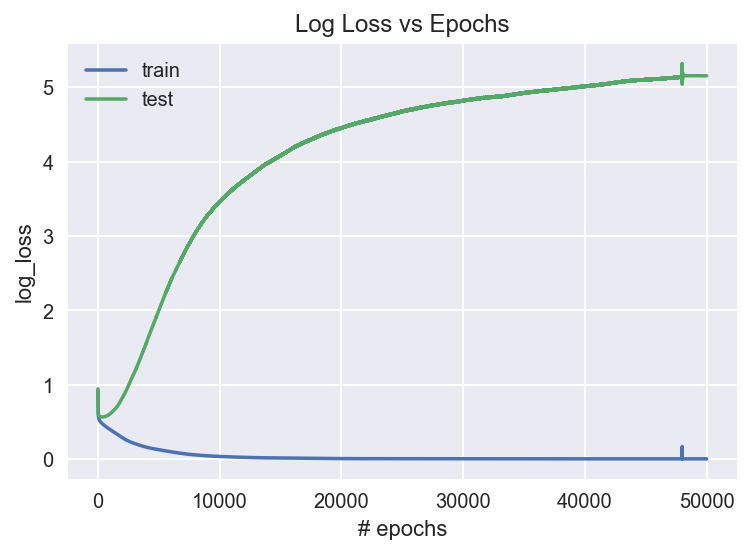

In [183]:
plt.plot(ind, tr_losses, label='train')
plt.plot(ind, te_losses, label='test')
plt.xlabel("# epochs")
plt.ylabel('log_loss')
plt.title("Log Loss vs Epochs")
plt.legend()
plt.show()

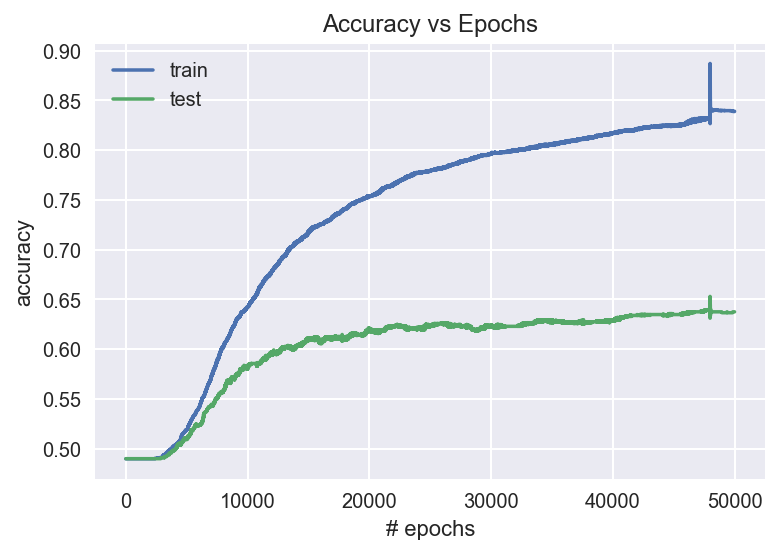

In [184]:
plt.plot(ind, tr_accuracy, label='train')
plt.plot(ind, te_accuracy, label='test')
plt.xlabel("# epochs")
plt.ylabel('accuracy')
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

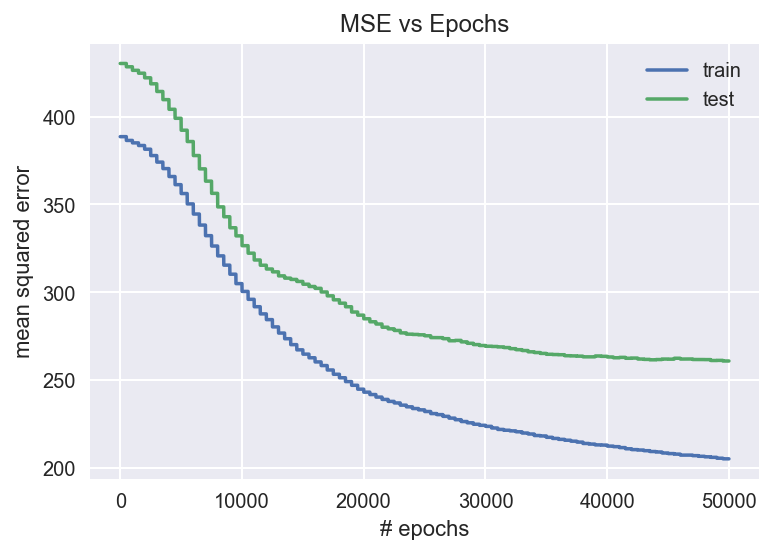

In [185]:
plt.plot(ind, tr_mse, label='train')
plt.plot(ind, te_mse, label='test')
plt.xlabel("# epochs")
plt.ylabel('mean squared error')
plt.title("MSE vs Epochs")
plt.legend()
plt.show()

In [186]:
r2_score(y_test.close_diff.values.reshape(-1,1), predR)

0.38615460093523646

In [187]:
r2_score(y_holdout.close_diff.values.reshape(-1,1), holdout_predR)

-50.647359897990448

In [188]:
mean_squared_error(y_test.close_diff.values.reshape(-1,1), predR)

262.18565240948317

In [189]:
mean_squared_error(y_holdout.close_diff.values.reshape(-1,1), holdout_predR)

5168.6695815867688

In [190]:
holdout_predC = holdout_predC.astype(int)

In [191]:
accuracy_score(y_holdout.increase.values.reshape(-1,1), holdout_predC)

0.38333333333333336

In [160]:
confusion_matrix(y_holdout.increase.values.reshape(-1,1), holdout_predC)

array([[29,  0],
       [31,  0]])